# DLProfile Example using Cosmoflow Benchmark

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:
#import shutil
#shutil.rmtree('/tmp/temp_analysis')

In [8]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/cosmoflow/cosmo_run1_p4.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 131662 of 131662 Parsing DXT File 
[============================================================] 100.0% 1830 of 1830 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [9]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000.tfrecords',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-001.h5',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/history.csv',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-002.h5',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-003.h5',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1001.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim1

In [24]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000.tfrecords',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-003.h5',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-004.h5',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-001.h5',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/history.csv',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-002.h5',
 '/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1001.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflo

### Collect the summary of the Application

In [10]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	118.00 seconds
Time spent in I/O		:	60.71 seconds
% Time spent in I/O		:	51.45%
Total Data Accessed		:	32.00 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read' 'write']
# of files used			:	10
# of MPI Ranks			:	4 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 262144 bytes
	Average			:	261572 bytes
	Median			:	262144 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 2500 MB/s
	Average			:	2056 MB/s
	Median			:	2500 MB/s
Access Pattern:
	Sequential		:	99.92%
	Consecutive		:	99.81%


Files Summary:
File Types			:	['yaml' 'pkl' 'tfrecords' 'h5' 'csv']
Dataset Size:
	Total			:	0.004 GB
	Min,Max			:	0.000 GB and 0.001 GB
	Average			:	0.001 GB


In [11]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 118.0 seconds'


In [12]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 60.71469 seconds'


### I/O time spent on each file

In [13]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml: 0.01 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl: 0.01 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000.tfrecords: 20.10 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-001.h5: 0.09 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/history.csv: 0.01 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-002.h5: 0.09 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-003.h5: 0.08 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse

### I/O Time spent per rank

In [14]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 22.63 seconds
I/O time for rank 1: 13.98 seconds
I/O time for rank 2: 19.57 seconds
I/O time for rank 3: 12.20 seconds


In [15]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 32.00 GB'

### I/O performed on each file

In [16]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml: 0.00 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl: 0.00 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000.tfrecords: 8192.03 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-001.h5: 0.92 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/history.csv: 0.00 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-002.h5: 0.92 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-003.h5: 0.92 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_

In [17]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 8194.78 MB
I/O performed by rank 1: 8192.03 MB
I/O performed by rank 2: 8192.03 MB
I/O performed by rank 3: 8192.03 MB


In [18]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'checkpoint-001': 961184.0,
 'checkpoint-002': 961184.0,
 'checkpoint-003': 961184.0,
 'checkpoint-004': 961184.0,
 'config': 711.0,
 'history': 256.0,
 'scaling_theta': 588.0}


### How application access data over time.

[============================================================] 100.0% 131370 of 131370 Creating Timeline 


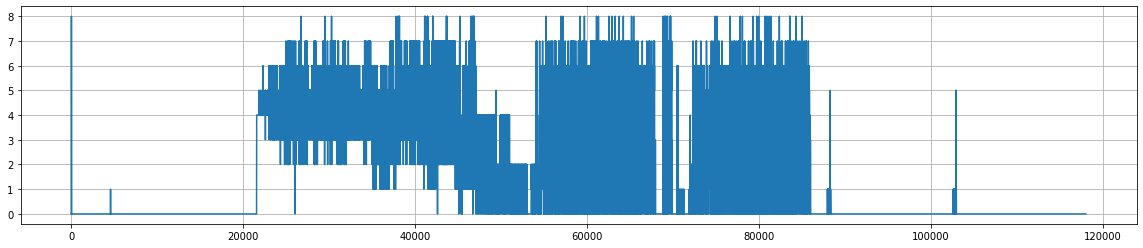

In [19]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['operation_count']);

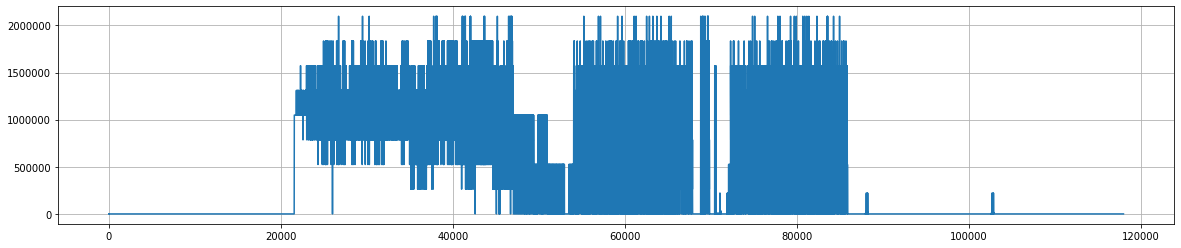

In [20]:
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 12 of 12 Creating Timeline 


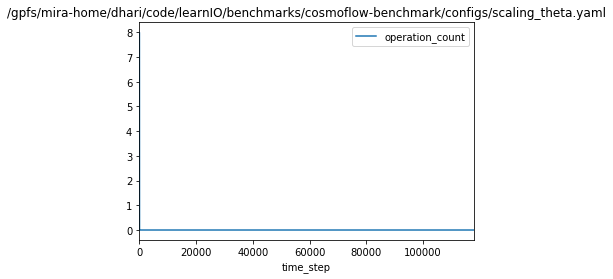


[============================================================] 100.0% 1 of 1 Creating Timeline 


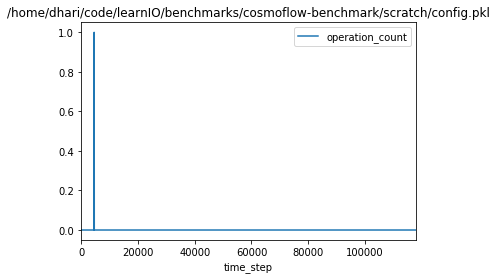

[============================================================] 100.0% 32780 of 32780 Creating Timeline 


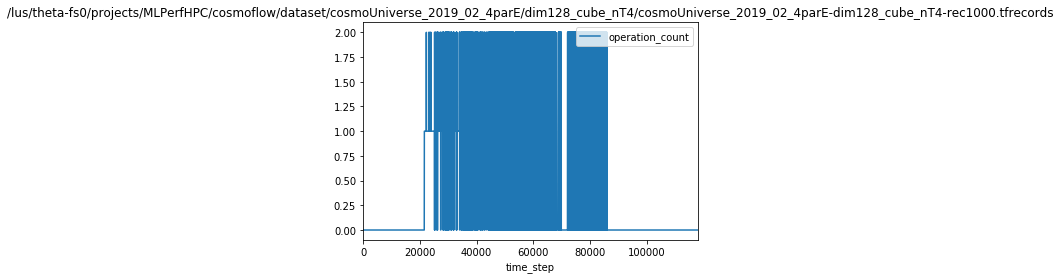

[============================================================] 100.0% 78 of 78 Creating Timeline 


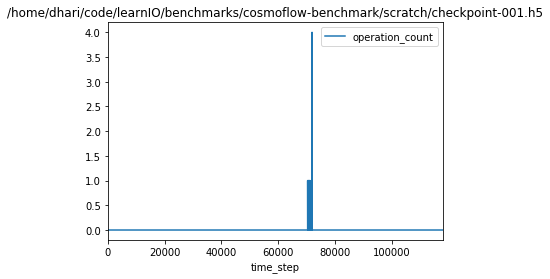

[============================================================] 100.0% 3 of 3 Creating Timeline 


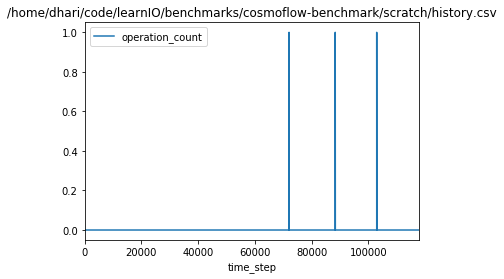

[============================================================] 100.0% 78 of 78 Creating Timeline 


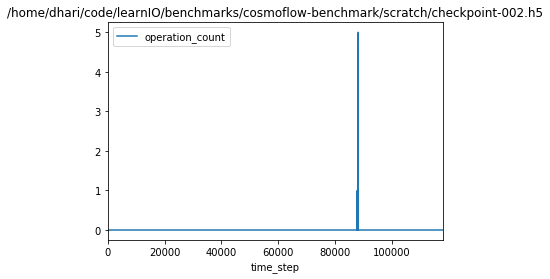

[============================================================] 100.0% 78 of 78 Creating Timeline 


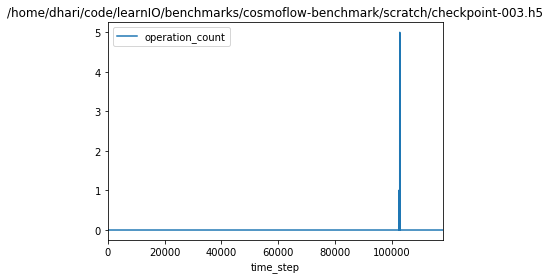

[============================================================] 100.0% 32780 of 32780 Creating Timeline 


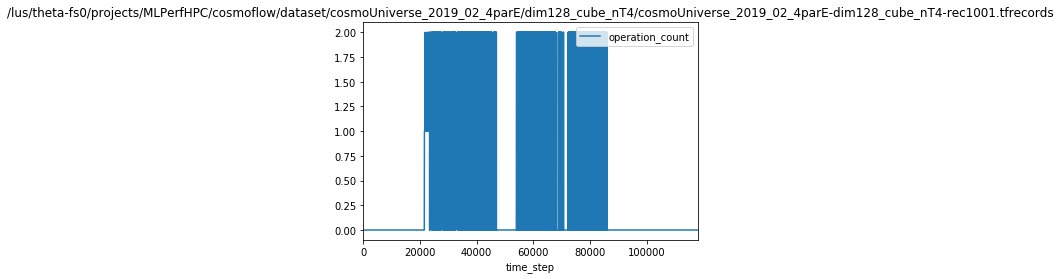

[============================================================] 100.0% 32780 of 32780 Creating Timeline 


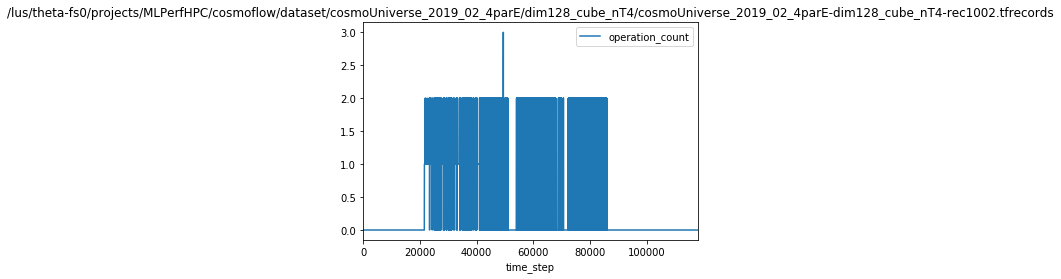

[============================================================] 100.0% 32780 of 32780 Creating Timeline 


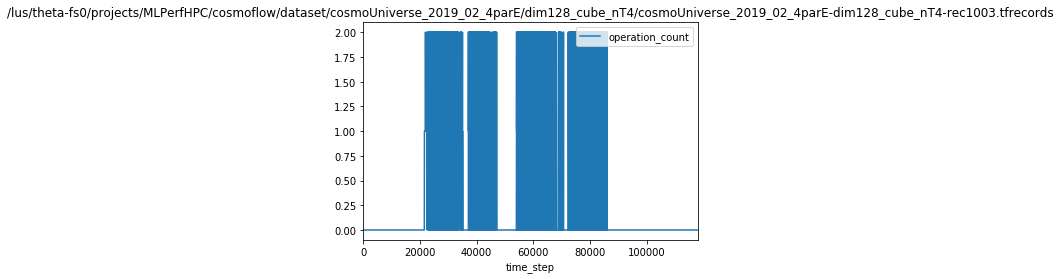

In [23]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 40714 of 40714 Creating Timeline 


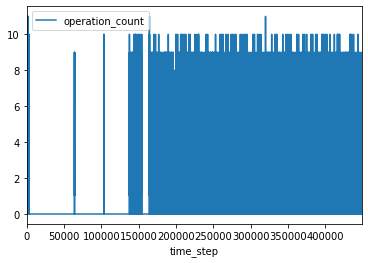

[============================================================] 100.0% 39118 of 39118 Creating Timeline 


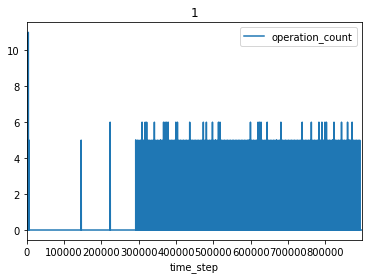

[============================================================] 100.0% 39299 of 39299 Creating Timeline 


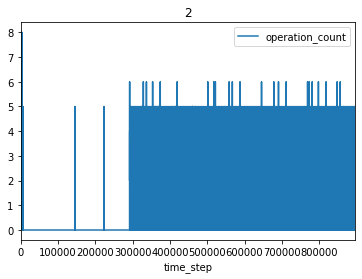

[============================================================] 100.0% 38682 of 38682 Creating Timeline 


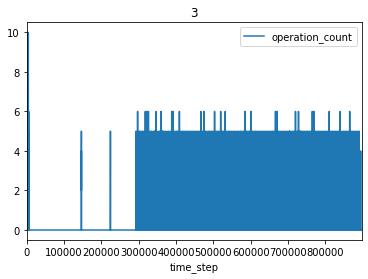

[============================================================] 100.0% 38010 of 38010 Creating Timeline 


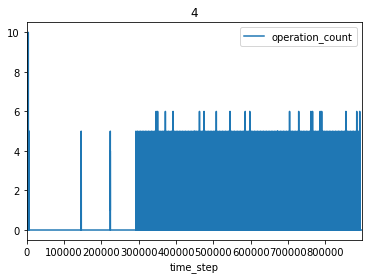

[============================================================] 100.0% 38243 of 38243 Creating Timeline 


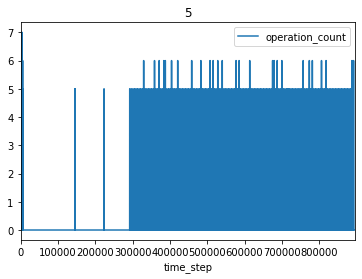

[============================================================] 100.0% 38774 of 38774 Creating Timeline 


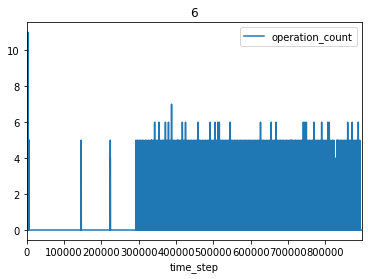

[============================================================] 100.0% 38180 of 38180 Creating Timeline 


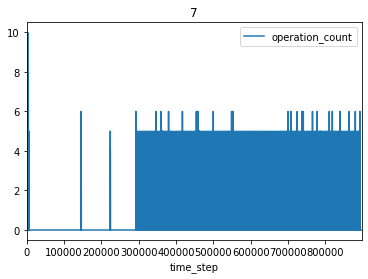

In [21]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

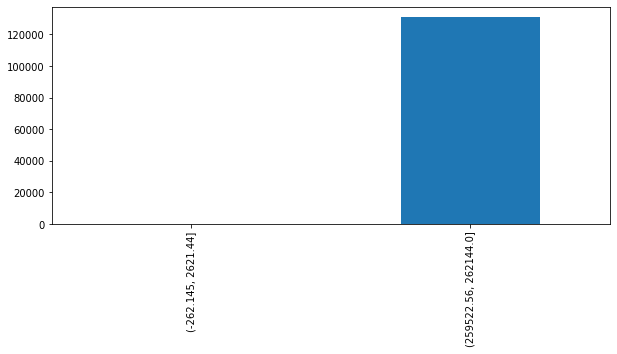

In [25]:
request_df = profile.GetIORequestDistribution()
request_df.plot(kind='bar', figsize=(10, 4));

### Data Transfer Size distribution for each file.

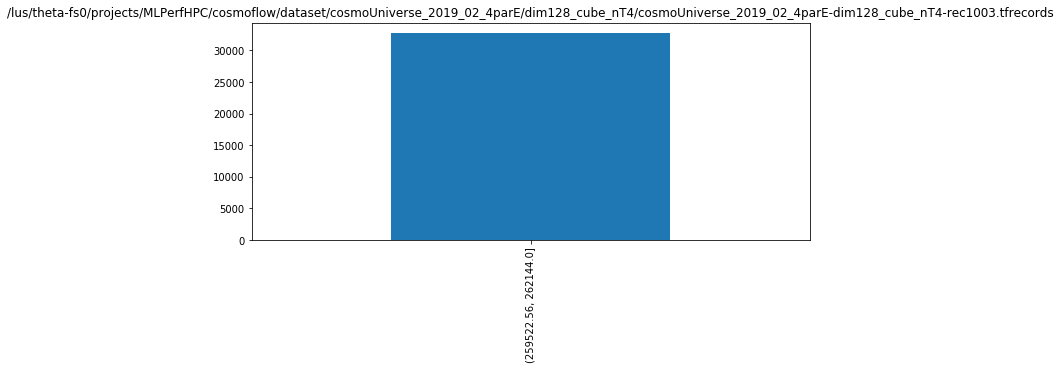

In [26]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)

### Data Transfer Sizes per Rank

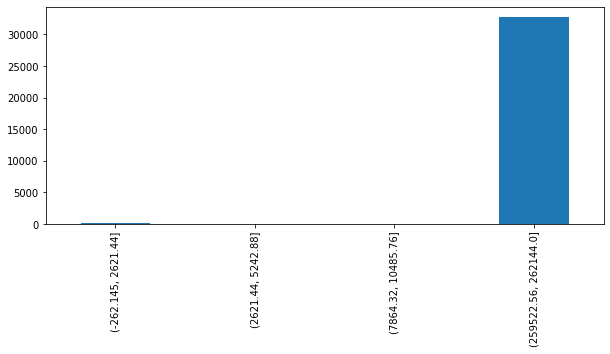

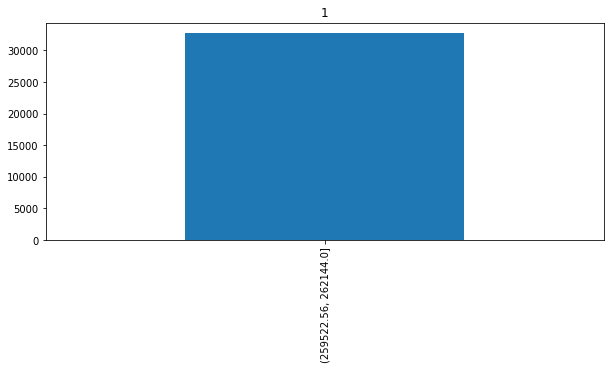

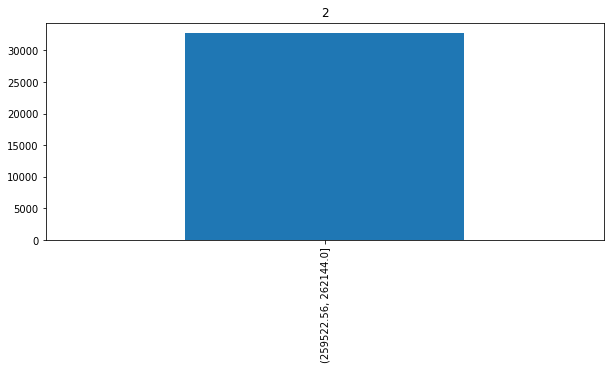

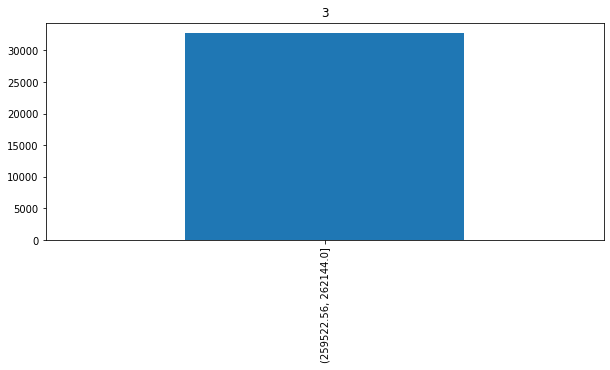

In [27]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [32]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    if os.path.exists(file):
        pp.pprint(profile.GetFileSummary(file))

{'ext': 'yaml',
 'filename': 'scaling_theta',
 'io_size': 2352,
 'io_time': 0.011685,
 'path': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
 'size': 588,
 'special': {}}
{'ext': 'pkl',
 'filename': 'config',
 'io_size': 711,
 'io_time': 0.00945,
 'path': '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl',
 'size': 711,
 'special': {}}
{'ext': 'h5',
 'filename': 'checkpoint-001',
 'io_size': 960008,
 'io_time': 0.086824,
 'path': '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-001.h5',
 'size': 961184,
 'special': {'keys': [{'keys': [{'keys': [{'keys': [{'name': 'bias:0',
                                                     'obj': <HDF5 dataset "bias:0": shape (16,), type "<f4">,
                                                     'shape': (16,),
                                                     'size': 16,
                                                     'type': 'dataset'},


{'ext': 'h5',
 'filename': 'checkpoint-002',
 'io_size': 960008,
 'io_time': 0.090108,
 'path': '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-002.h5',
 'size': 961184,
 'special': {'keys': [{'keys': [{'keys': [{'keys': [{'name': 'bias:0',
                                                     'obj': <HDF5 dataset "bias:0": shape (16,), type "<f4">,
                                                     'shape': (16,),
                                                     'size': 16,
                                                     'type': 'dataset'},
                                                    {'name': 'kernel:0',
                                                     'obj': <HDF5 dataset "kernel:0": shape (2, 2, 2, 4, 16), type "<f4">,
                                                     'shape': (2, 2, 2, 4, 16),
                                                     'size': 512,
                                                     'type': 'dataset'}]

                                 'name': 'leaky_re_lu_5',
                                 'type': 'group'},
                                {'keys': [],
                                 'name': 'leaky_re_lu_6',
                                 'type': 'group'},
                                {'keys': [],
                                 'name': 'max_pooling3d',
                                 'type': 'group'},
                                {'keys': [],
                                 'name': 'max_pooling3d_1',
                                 'type': 'group'},
                                {'keys': [],
                                 'name': 'max_pooling3d_2',
                                 'type': 'group'},
                                {'keys': [],
                                 'name': 'max_pooling3d_3',
                                 'type': 'group'},
                                {'keys': [],
                                 'name': 'max_pooling3d_4',
          